<a href="https://colab.research.google.com/github/setyo-dwi-pratama/JABARDigitalService/blob/main/JABAR_Dig_Ser_No5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOAL 5**
Tim Data Analyst memiliki sejumlah project yang berkaitan dengan Dinas lain. Pada kasus berikut Dinas terkait meminta request adhoc yang sifatnya dibutuhkan cepat. Data Analyst diminta untuk query SQL data yang terdapat di database dengan beberapa pertanyaan sebagai berikut:


1.   Lokasi manakah yang paling banyak mengalami kemacetan level 5?
2.   Berapa banyak kemacetan level 5 yang terjadi di Kota Bandung dalam sebulan terakhir?
3.    3 Lokasi manakah yang memiliki rata-rata kecepatan terendah dalam satu minggu terakhir pada jam 15-18?
4.    Temukan anomali yang terdapat pada tabel sampel data tersebut!



# **Dataset**
id : id unik sample data

kemendagri_kabupaten_nama : Nama Kota Kabupaten

kemendagri_kabupaten_kode : Kode Kota Kabupaten

date : Tanggal terjadinya kemacetan

hour : Jam terjadinya kemacetan

level : Level kemacetan

geometry : lokasi atau titik terjadinya kemacetan

avg_speed_kmh : Rata-rata kecepatan kendaraan kolometer per jam

# **Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Input Data**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/setyo-dwi-pratama/JABARDigitalService/main/Sample%20Data%20-%20sample_data.csv')

In [3]:
data

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
0,8230974,KOTA BANDUNG,32.73,2020-01-01,7,2,"{'type': 'MultiLineString', 'coordinates': [[[...",14.06750
1,8230965,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",8.55000
2,8230966,KOTA BANDUNG,32.73,2020-01-01,6,4,"{'type': 'MultiLineString', 'coordinates': [[[...",3.94875
3,8230967,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",20.20710
4,8230968,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",40.94400
...,...,...,...,...,...,...,...,...
145,8231145,KOTA BANDUNG,32.73,2020-01-01,9,2,"{'type': 'MultiLineString', 'coordinates': [[[...",17.02500
146,8231114,KOTA BANDUNG,32.73,2020-01-01,9,2,"{'type': 'LineString', 'coordinates': [[107.61...",13.04000
147,8231115,KOTA BANDUNG,32.73,2020-01-01,9,2,"{'type': 'MultiLineString', 'coordinates': [[[...",17.73760
148,8231116,KOTA BANDUNG,32.73,2020-01-01,9,3,"{'type': 'MultiLineString', 'coordinates': [[[...",12.53960


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         150 non-null    int64  
 1   kemendagri_kabupaten_nama  150 non-null    object 
 2   kemendagri_kabupaten_kode  150 non-null    float64
 3   date                       150 non-null    object 
 4   hour                       150 non-null    int64  
 5   level                      150 non-null    int64  
 6   geometry                   149 non-null    object 
 7   avg_speed_kmh              150 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 9.5+ KB


In [5]:
data.isnull().sum()

id                           0
kemendagri_kabupaten_nama    0
kemendagri_kabupaten_kode    0
date                         0
hour                         0
level                        0
geometry                     1
avg_speed_kmh                0
dtype: int64

In [9]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         150 non-null    int64         
 1   kemendagri_kabupaten_nama  150 non-null    object        
 2   kemendagri_kabupaten_kode  150 non-null    float64       
 3   date                       150 non-null    datetime64[ns]
 4   hour                       150 non-null    int64         
 5   level                      150 non-null    int64         
 6   geometry                   149 non-null    object        
 7   avg_speed_kmh              150 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 9.5+ KB


In [10]:
data

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
0,8230974,KOTA BANDUNG,32.73,2020-01-01,7,2,"{'type': 'MultiLineString', 'coordinates': [[[...",14.06750
1,8230965,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",8.55000
2,8230966,KOTA BANDUNG,32.73,2020-01-01,6,4,"{'type': 'MultiLineString', 'coordinates': [[[...",3.94875
3,8230967,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",20.20710
4,8230968,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",40.94400
...,...,...,...,...,...,...,...,...
145,8231145,KOTA BANDUNG,32.73,2020-01-01,9,2,"{'type': 'MultiLineString', 'coordinates': [[[...",17.02500
146,8231114,KOTA BANDUNG,32.73,2020-01-01,9,2,"{'type': 'LineString', 'coordinates': [[107.61...",13.04000
147,8231115,KOTA BANDUNG,32.73,2020-01-01,9,2,"{'type': 'MultiLineString', 'coordinates': [[[...",17.73760
148,8231116,KOTA BANDUNG,32.73,2020-01-01,9,3,"{'type': 'MultiLineString', 'coordinates': [[[...",12.53960


## 1. Lokasi manakah yang paling banyak mengalami kemacetan level 5?

In [17]:
nomor1 = data.loc[data['level'] == 5]
nomor1

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
17,8230983,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
28,8230994,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
29,8230995,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
30,8230996,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
53,8231018,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
54,8231019,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
55,8231029,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
56,8231041,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
57,8231042,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
80,8231085,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0


## 2. Berapa banyak kemacetan level 5 yang terjadi di Kota Bandung dalam sebulan terakhir?

In [26]:
nomor2 = data.loc[data['level'] == 5]
nomor2.reset_index(inplace=True)
nomor2

,index,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
0,17,8230983,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
1,28,8230994,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
2,29,8230995,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
3,30,8230996,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
4,53,8231018,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
5,54,8231019,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
6,55,8231029,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
7,56,8231041,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
8,57,8231042,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
9,80,8231085,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0


In [24]:
nomor2['kemendagri_kabupaten_nama'].value_counts()

KOTA BANDUNG    11
Name: kemendagri_kabupaten_nama, dtype: int64

## 3. Tiga Lokasi manakah yang memiliki rata-rata kecepatan terendah dalam satu minggu terakhir pada jam 15-18?

In [39]:
nomor3 = data.sort_values(by=['avg_speed_kmh'], ignore_index=True)
nomor3

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
0,8230995,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0000
1,8230983,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0000
2,8230994,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0000
3,8231042,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0000
4,8230996,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0000
...,...,...,...,...,...,...,...,...
145,8231056,KOTA BANDUNG,32.73,2020-01-01,8,1,"{'type': 'MultiLineString', 'coordinates': [[[...",33.6400
146,8231070,KOTA BANDUNG,32.73,2020-01-01,8,2,"{'type': 'MultiLineString', 'coordinates': [[[...",34.7400
147,8231013,KOTA BANDUNG,32.73,2020-01-01,7,2,"{'type': 'MultiLineString', 'coordinates': [[[...",38.8994
148,8230968,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",40.9440


In [41]:
nomor3.loc[0:2]

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
0,8230995,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
1,8230983,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
2,8230994,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0


## 4. Temukan anomali yang terdapat pada tabel sampel data tersebut!

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


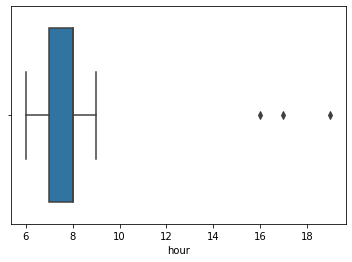

In [55]:
sns.boxplot(data["hour"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


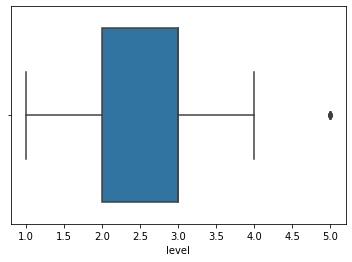

In [65]:
sns.boxplot(data["level"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


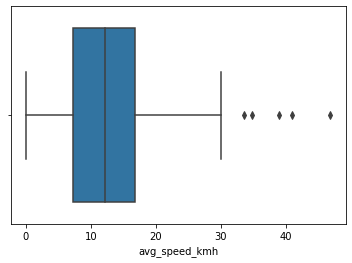

In [66]:
sns.boxplot(data["avg_speed_kmh"])